In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_csv('ds.csv')
df.head()

DESCRIPTION  EXTRACT_DATE DATA_SOURCE  \
0  A Lovely Apartment Perfect As Your Next Home      20211028    Dubizzle   
1     A Resort Style Lifestyle With Water Views      20211028    Dubizzle   
2  A Splendid Apartment With Multiple Functions      20211028    Dubizzle   
3              AMAZING 2BD DIRECT FROM LANDLORD      20211028    Dubizzle   
4   AMAZING VIEW | Book Now! | Flexible Payment      20211028    Dubizzle   

  PROPERTY_TYPE    LOCATION     REGION   PRICE  FLOOR_SIZE  NO_OF_BEDROOMS  \
0          Rent  Yas Island  Abu Dhabi   85000        1068               2   
1          Rent  Yas Island  Abu Dhabi   79960        1050               2   
2          Rent  Yas Island  Abu Dhabi   85000        1044               2   
3          Rent  Yas Island  Abu Dhabi  115000        1472               2   
4          Rent  Yas Island  Abu Dhabi   84995        1674               2   

   NO_OF_BATHROOMS  PRICE_SQFT Unnamed: 11  
0                2   79.588015         NaN  
1                2   76.152381         NaN  
2                2   81.417625         NaN  
3                3   78.125000         NaN  
4                3   50.773596         NaN

In [3]:
label_encoder = preprocessing.LabelEncoder() 
df['DESCRIPTION'] = label_encoder.fit_transform(df['PRICE'])
df.head()

DESCRIPTION  EXTRACT_DATE DATA_SOURCE PROPERTY_TYPE    LOCATION     REGION  \
0           40      20211028    Dubizzle          Rent  Yas Island  Abu Dhabi   
1           28      20211028    Dubizzle          Rent  Yas Island  Abu Dhabi   
2           40      20211028    Dubizzle          Rent  Yas Island  Abu Dhabi   
3           70      20211028    Dubizzle          Rent  Yas Island  Abu Dhabi   
4           38      20211028    Dubizzle          Rent  Yas Island  Abu Dhabi   

    PRICE  FLOOR_SIZE  NO_OF_BEDROOMS  NO_OF_BATHROOMS  PRICE_SQFT Unnamed: 11  
0   85000        1068               2                2   79.588015         NaN  
1   79960        1050               2                2   76.152381         NaN  
2   85000        1044               2                2   81.417625         NaN  
3  115000        1472               2                3   78.125000         NaN  
4   84995        1674               2                3   50.773596         NaN

In [4]:
df.shape

(358, 12)

In [5]:
df.info

<bound method DataFrame.info of      DESCRIPTION  EXTRACT_DATE DATA_SOURCE PROPERTY_TYPE        LOCATION  \
0             40      20211028    Dubizzle          Rent      Yas Island   
1             28      20211028    Dubizzle          Rent      Yas Island   
2             40      20211028    Dubizzle          Rent      Yas Island   
3             70      20211028    Dubizzle          Rent      Yas Island   
4             38      20211028    Dubizzle          Rent      Yas Island   
..           ...           ...         ...           ...             ...   
353           31      20211028    Dubizzle          Rent  Al Reem Island   
354           50      20211028    Dubizzle          Rent  Al Reem Island   
355           77      20211028    Dubizzle          Rent  Al Reem Island   
356           43      20211028    Dubizzle          Rent  Al Reem Island   
357           14      20211028    Dubizzle          Rent  Al Reem Island   

        REGION   PRICE  FLOOR_SIZE  NO_OF_BEDROOMS  NO_

In [6]:
df['DATA_SOURCE'].isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: DATA_SOURCE, Length: 358, dtype: bool

In [7]:
df['FLOOR_SIZE'].value_counts()

FLOOR_SIZE
1163    11
1300    10
1722    10
1044     9
1450     9
        ..
1086     1
1445     1
2421     1
1313     1
1858     1
Name: count, Length: 165, dtype: int64

In [9]:
df['DATA_SOURCE'].value_counts(normalize =True)

DATA_SOURCE
Dubizzle    1.0
Name: proportion, dtype: float64

In [10]:
df.describe()

DESCRIPTION  EXTRACT_DATE          PRICE   FLOOR_SIZE  NO_OF_BEDROOMS  \
count   358.000000         358.0     358.000000   358.000000           358.0   
mean     40.916201    20211028.0   90035.544693  1320.986034             2.0   
std      21.014966           0.0   18789.327604   226.662874             0.0   
min       0.000000    20211028.0   62500.000000   678.000000             2.0   
25%      25.250000    20211028.0   77250.000000  1108.000000             2.0   
50%      40.000000    20211028.0   85000.000000  1308.000000             2.0   
75%      58.750000    20211028.0   99999.750000  1500.000000             2.0   
max      81.000000    20211028.0  184000.000000  2421.000000             2.0   

       NO_OF_BATHROOMS  PRICE_SQFT  
count       358.000000  358.000000  
mean          2.807263   68.772608  
std           0.583866   11.571150  
min           1.000000   45.072115  
25%           2.000000   60.084823  
50%           3.000000   66.381818  
75%           3.000000   76.691992  
max           5.000000  111.034004

In [11]:
df['NO_OF_BEDROOMS'].value_counts()

NO_OF_BEDROOMS
2    358
Name: count, dtype: int64

<Axes: xlabel='PRICE_SQFT', ylabel='Count'>

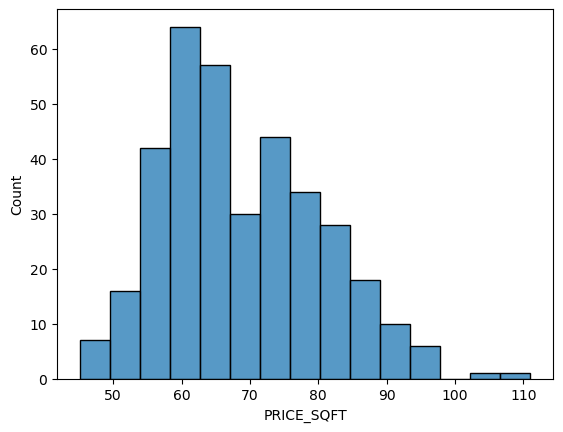

In [12]:
sns.histplot(df['PRICE_SQFT'])

In [14]:
df.groupby('NO_OF_BEDROOMS')['PRICE_SQFT'].describe()

count       mean       std        min        25%        50%  \
NO_OF_BEDROOMS                                                                
2               358.0  68.772608  11.57115  45.072115  60.084823  66.381818   

                      75%         max  
NO_OF_BEDROOMS                         
2               76.691992  111.034004

In [15]:
import seaborn as sns

C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


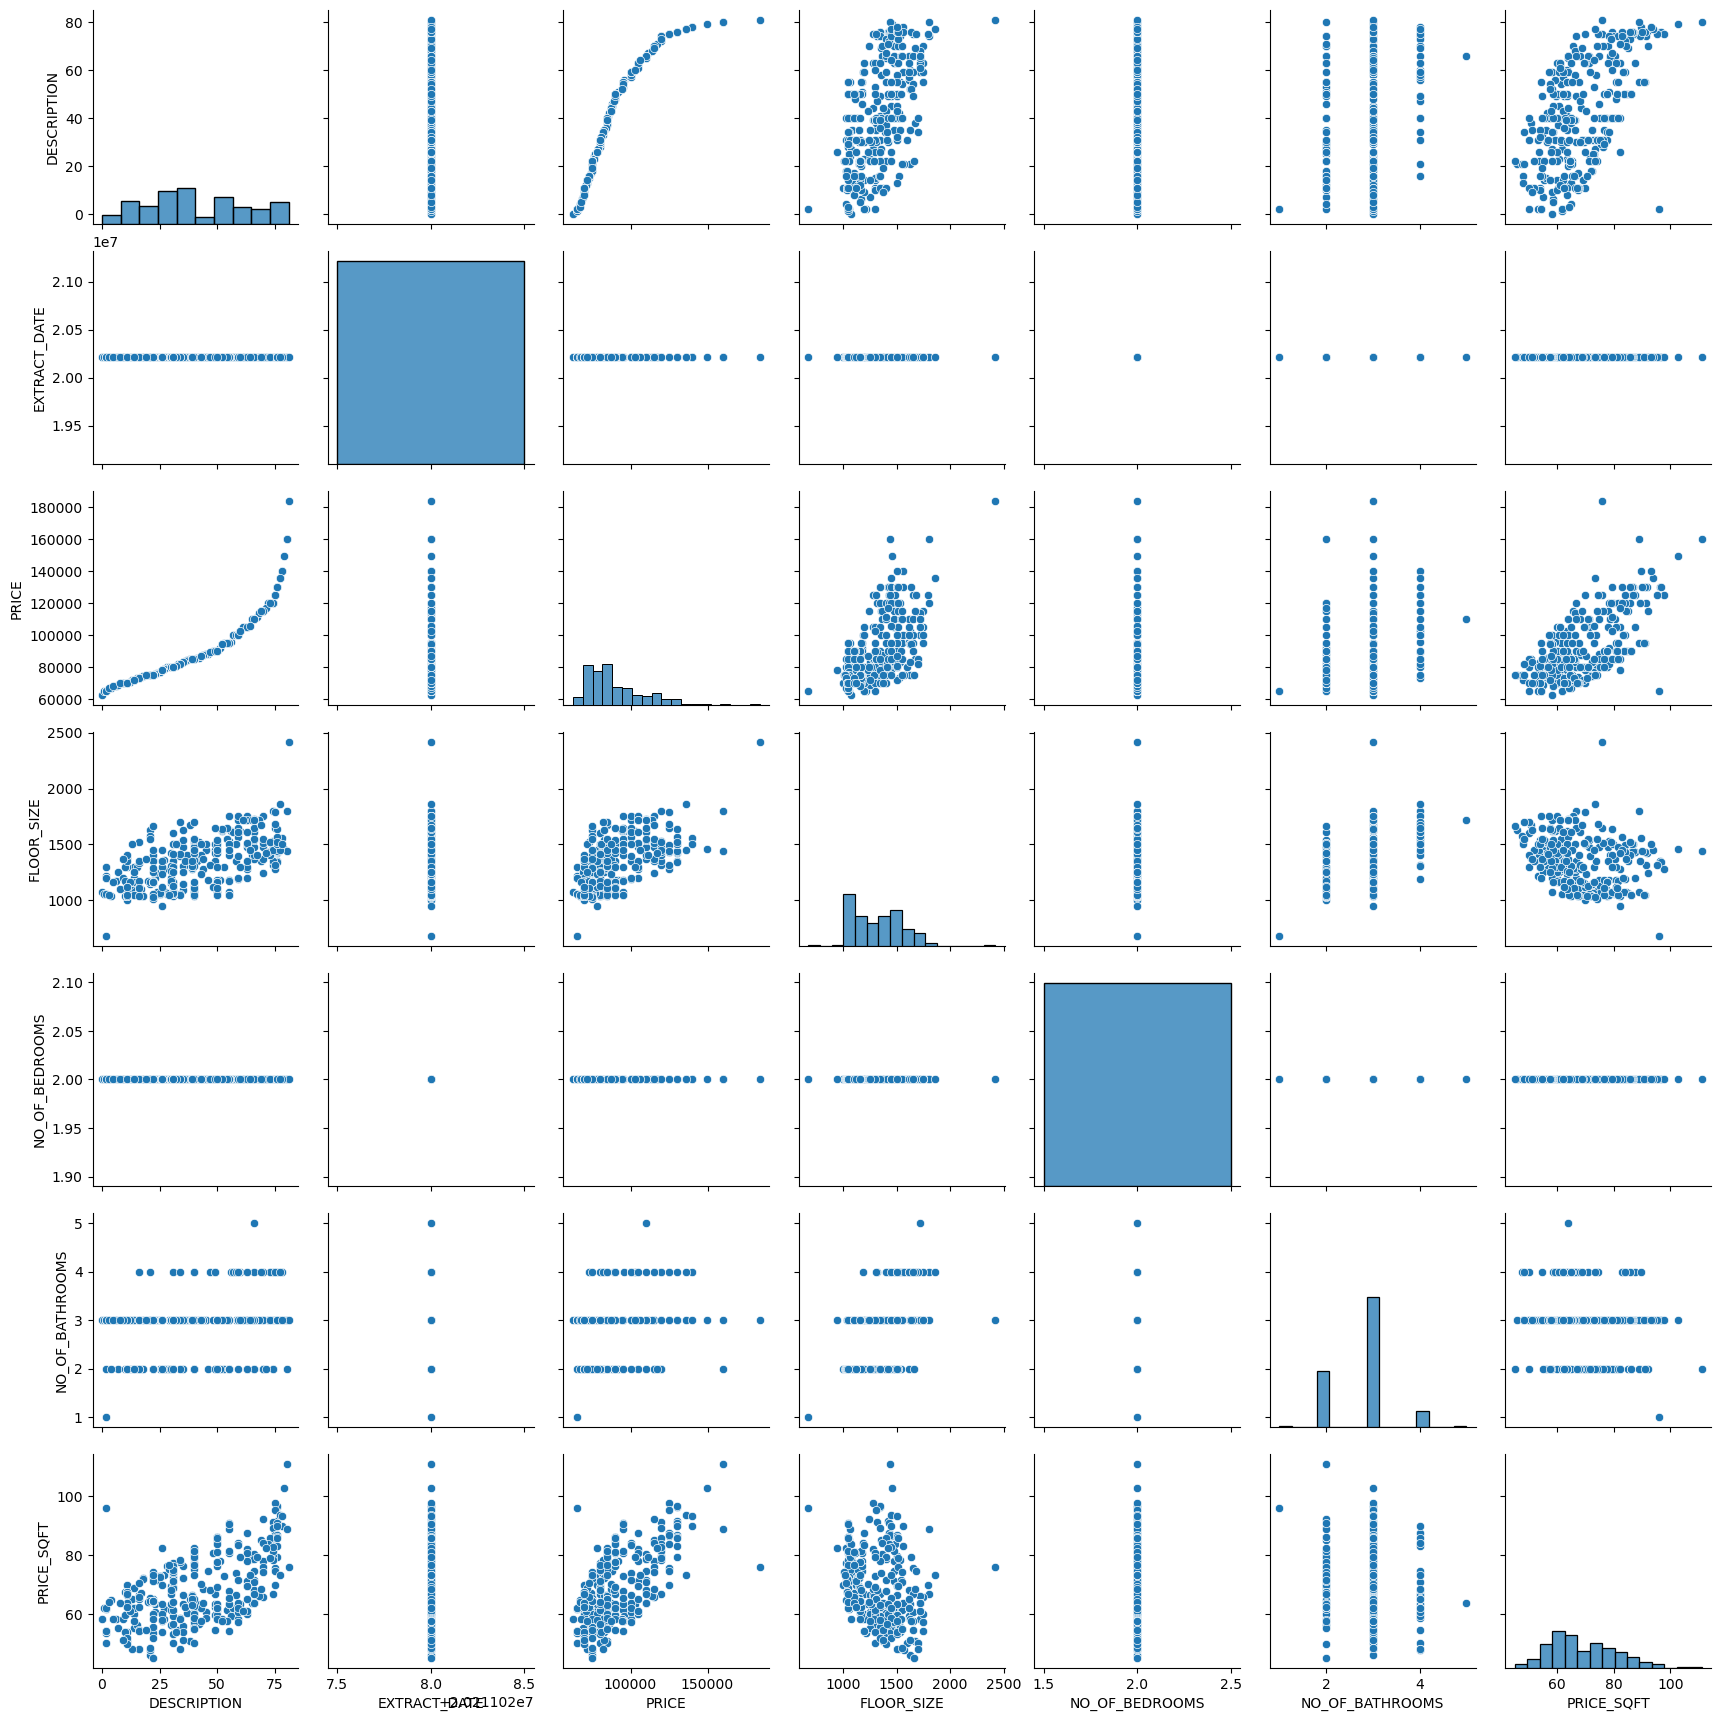

In [16]:
sns.pairplot(data = df)

In [17]:
df.groupby('NO_OF_BEDROOMS')['PRICE_SQFT'].describe()

count       mean       std        min        25%        50%  \
NO_OF_BEDROOMS                                                                
2               358.0  68.772608  11.57115  45.072115  60.084823  66.381818   

                      75%         max  
NO_OF_BEDROOMS                         
2               76.691992  111.034004